##  SURNAME:Rasouli Jambori  NAME: Deniz

In [13]:
import numpy as np
from scipy import signal, spatial
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from skimage import draw as drw
from skimage import data, color, exposure, img_as_float, img_as_ubyte, morphology, filters 
from skimage import io

import skimage
%matplotlib inline

## 1- Background
Let's visualize an empty scene captured by a fixed camera, and the same scene where objects are present

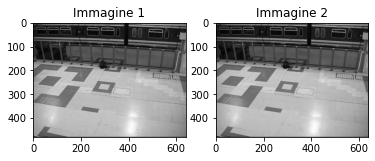

In [2]:
filename="C://Users//Pishro System///EmptyScene01.jpg"
I1=io.imread(filename)
#filename='images/es1/video/frame0251.jpg'
filename="C://Users//Pishro System///EmptyScene02.jpg"
I2=io.imread(filename)
Ig1=img_as_float(color.rgb2gray(I1))
Ig2=img_as_float(color.rgb2gray(I2))

plt.subplot(121)
plt.imshow(Ig1,cmap='gray')
plt.title('Immagine 1')
plt.subplot(122)
plt.imshow(Ig2,cmap='gray')
plt.title('Immagine 2');

Let's try to see the difference in terms of Grayscale intensities of corresponding pixels across the two images

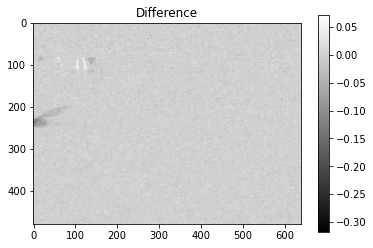

In [3]:
D = Ig1 - Ig2
 
plt.imshow(D,cmap='gray')
plt.title('Difference')
plt.colorbar()
plt.show()

Indeed, the difference seems to be small for most pixels:

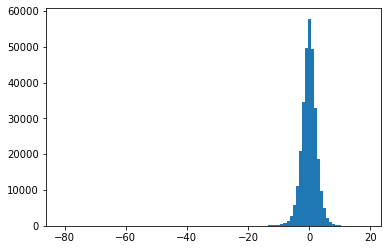

In [4]:
# multiplying by 255 to get a feeling of the differences entity
# with respect to input values
plt.hist(255*D.ravel(),100);

### Analysis

- Comment the histogram you just visualized


###  <font color="blueviolet">Analysis and Comments: <font color="navy">As it can be seen, the distribution of the differences we have in our differences image is between -20 and +20. If we take a deeper look at the distribution, we can see that the most of our differences are places in the zero difference level this means that the most part of these two images are the same. In terms of the other parts as the differences get bigger the distribution around it get smaller. I belive if we want to for example define a treshold in order to make difference equal to zero treshold=20 can be the ideal case in terms of making the differences plot equal to zero in all parts.
### <font color="navy">Another point is about the fact that our minimum of differences is in some point around -80 so this is the reason why our plot is not centered.
### <font color="navy"> The last point is the reason behind the being symmetric of the differences plot. This is the case because all the noises in the nature in some how are gaussian distributed so the final result of differences which is caused mostly because of the natural noise is again distributed like gaussian form.

## 2- Change detection

You may try out different frames

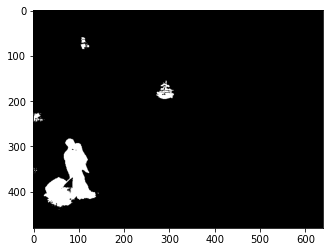

In [5]:
threshold = 0.1 #let's pick a threshold
filename='C://Users//Pishro System///es1/video/frame0251.jpg'
It=io.imread(filename)
Itg=img_as_float(color.rgb2gray(It))

# check slide "Motion segmentation" Change detection
Dabs=(abs(Ig1-Itg)>threshold)
plt.imshow(Dabs,cmap='gray')
plt.show()

Have a look at the histogram of the differences to pick a better threshold

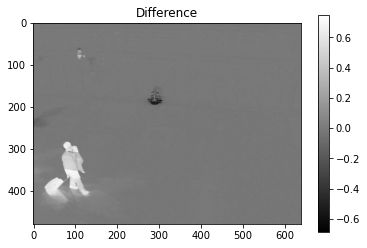

In [6]:
## fill in the code and add comments if appropriate
D = Ig1-Itg
plt.imshow(D,cmap='gray')
plt.title('Difference')
plt.colorbar()
plt.show()


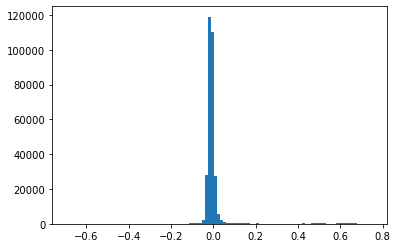

In [7]:
plt.hist(D.ravel(),100);

###  <font color="blueviolet">Analysis and Comments:  <font color="navy"> As it can be seen, if we want to pick a treshold that covers all the differences, the 0.05 is a proper value, but considering the fact that small changes for example due to the light change or some shadows in the scene, don't consist of any significant information, I think all the tresholds between 0.05 and 0.1 can be reasonable.
   ### <font color="navy"> Below I plotted some of these treshold results to make comparison by human eye:

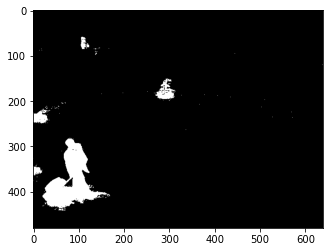

In [8]:
threshold = 0.06 #let's pick a threshold
filename='C://Users//Pishro System///es1/video/frame0251.jpg'
It=io.imread(filename)
Itg=img_as_float(color.rgb2gray(It))

# check slide "Motion segmentation" Change detection
Dabs=(abs(Ig1-Itg)>threshold)
plt.imshow(Dabs,cmap='gray')
plt.show()

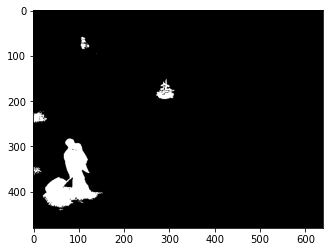

In [9]:
threshold = 0.08 #let's pick a threshold
filename='C://Users//Pishro System///es1/video/frame0251.jpg'
It=io.imread(filename)
Itg=img_as_float(color.rgb2gray(It))

# check slide "Motion segmentation" Change detection
Dabs=(abs(Ig1-Itg)>threshold)
plt.imshow(Dabs,cmap='gray')
plt.show()

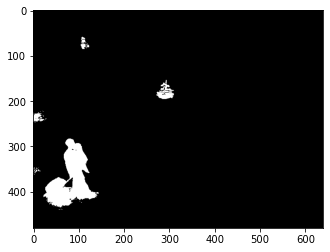

In [10]:
threshold = 0.09 #let's pick a threshold
filename='C://Users//Pishro System///es1/video/frame0251.jpg'
It=io.imread(filename)
Itg=img_as_float(color.rgb2gray(It))

# check slide "Motion segmentation" Change detection
Dabs=(abs(Ig1-Itg)>threshold)
plt.imshow(Dabs,cmap='gray')
plt.show()

If you want, you may improve the results with an appropriate post processing. Binary images may be cleaned by means of <a href="https://en.wikipedia.org/wiki/Mathematical_morphology">Morphology operations</a>


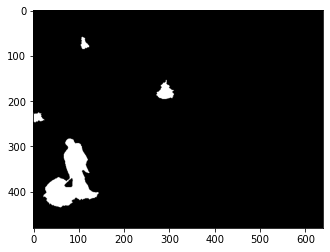

In [12]:
from skimage import morphology as mp
from skimage import data, util
from skimage.measure import label

mask=mp.disk(2) # the structuring element size controls the filling/deletion scale

Dabs=mp.closing(Dabs,mask)
Dabs=skimage.morphology.remove_small_objects(Dabs,100)
plt.imshow(Dabs,cmap='gray')
plt.show()
 

###  <font color="blueviolet">Analysis and Comments: <font color="navy">In the mp.disk part we will apply a deletion operation on a neighboorhood pixels of the target pixel.It Generates a flat, disk-shaped footprint. A pixel is within the neighborhood if the Euclidean distance between it and the origin is no greater than radius. If we increase the radius the white parts become bigger and loose their original shape.
   ### <font color="navy"> As for closing part, the morphological closing on an image is defined as a dilation followed by an erosion. Closing can remove small dark spots and connect small bright cracks. This tends to “close” up (dark) gaps between (bright) features. This improve the visualization of the binary image that we got from change detection algorithm.